In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**DATA EXPLORATION**

*1.categorical features*

-made a bar sharts to understand balance of classes

-made a pivot table to understand relationship with target feature(survivale)

*2.nemurical features*

-made hist to understand the distribution of features

-Correplot

-pivot table comparing survival rate across numeric variables

**DATA VISUALIZATION**


**1.Numerical features**

Age

Fare

**2.categorical features:**

Pclass

Sex

SibSp ( # of siblings and spouse)

Parch ( # of parents and children)

Embarked

Cabin

    

In [6]:
cat_var = df_train[['Pclass','Sex','SibSp','Parch','Embarked','Cabin','Ticket']]
num_var = df_train[['Age','Fare']]

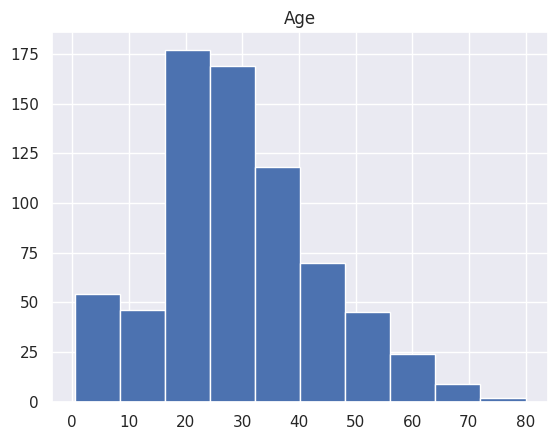

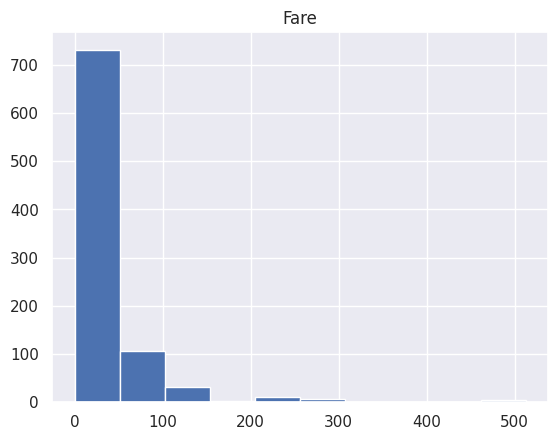

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
for i in num_var.columns:
    plt.hist(num_var[i])
    plt.title(i)
    plt.show()


In [8]:
pd.pivot_table(df_train,index = 'Survived',values = ['Age','Fare'] )

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [9]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

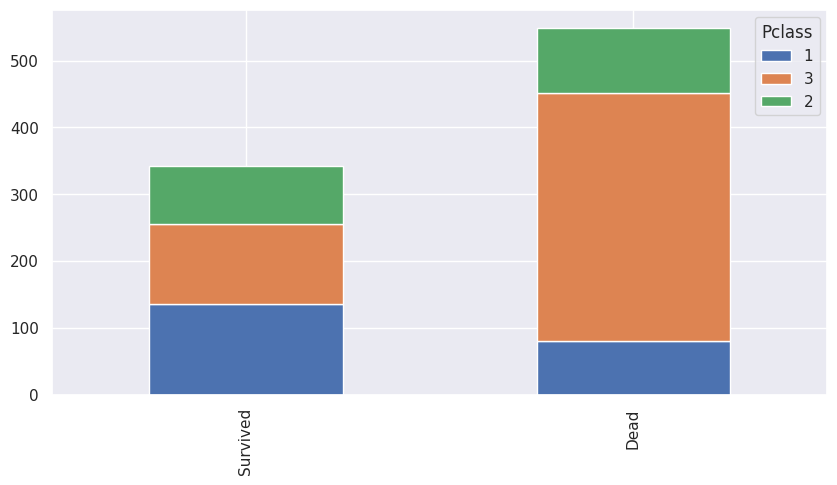

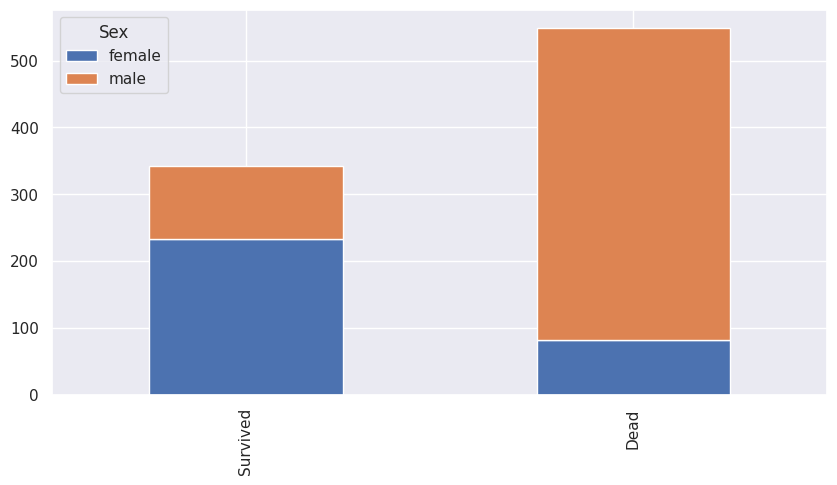

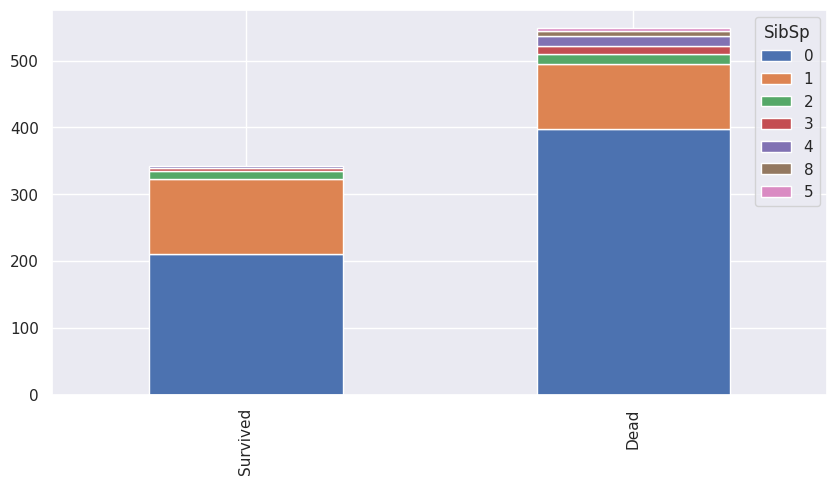

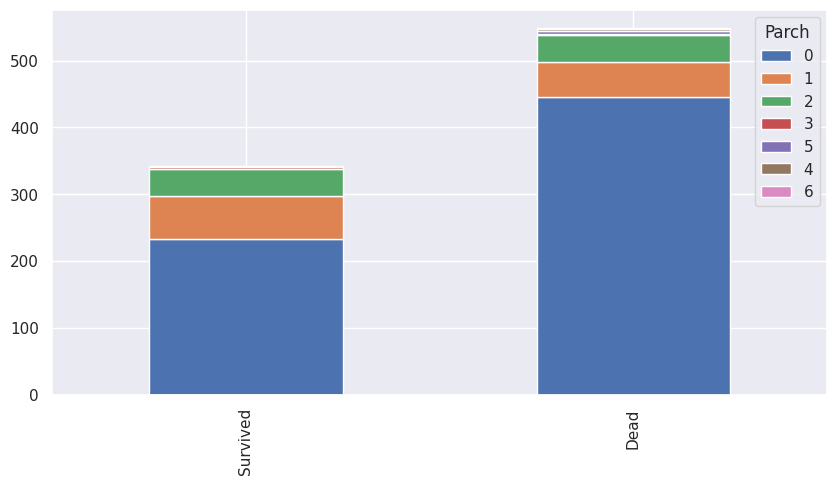

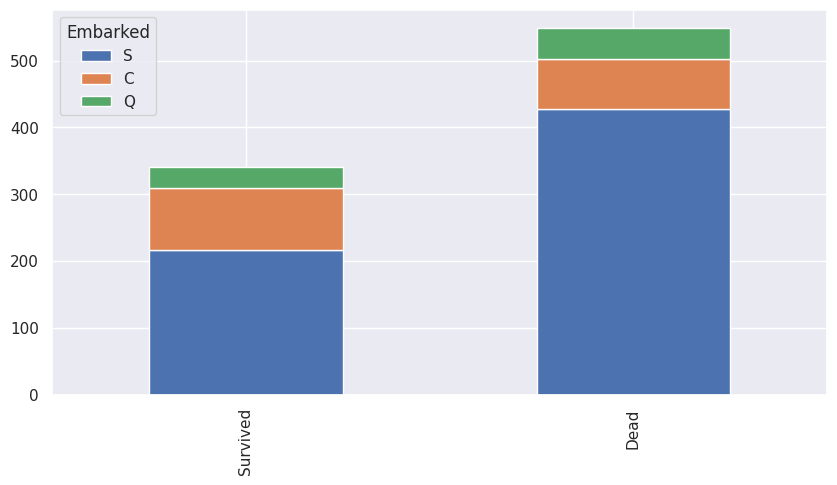

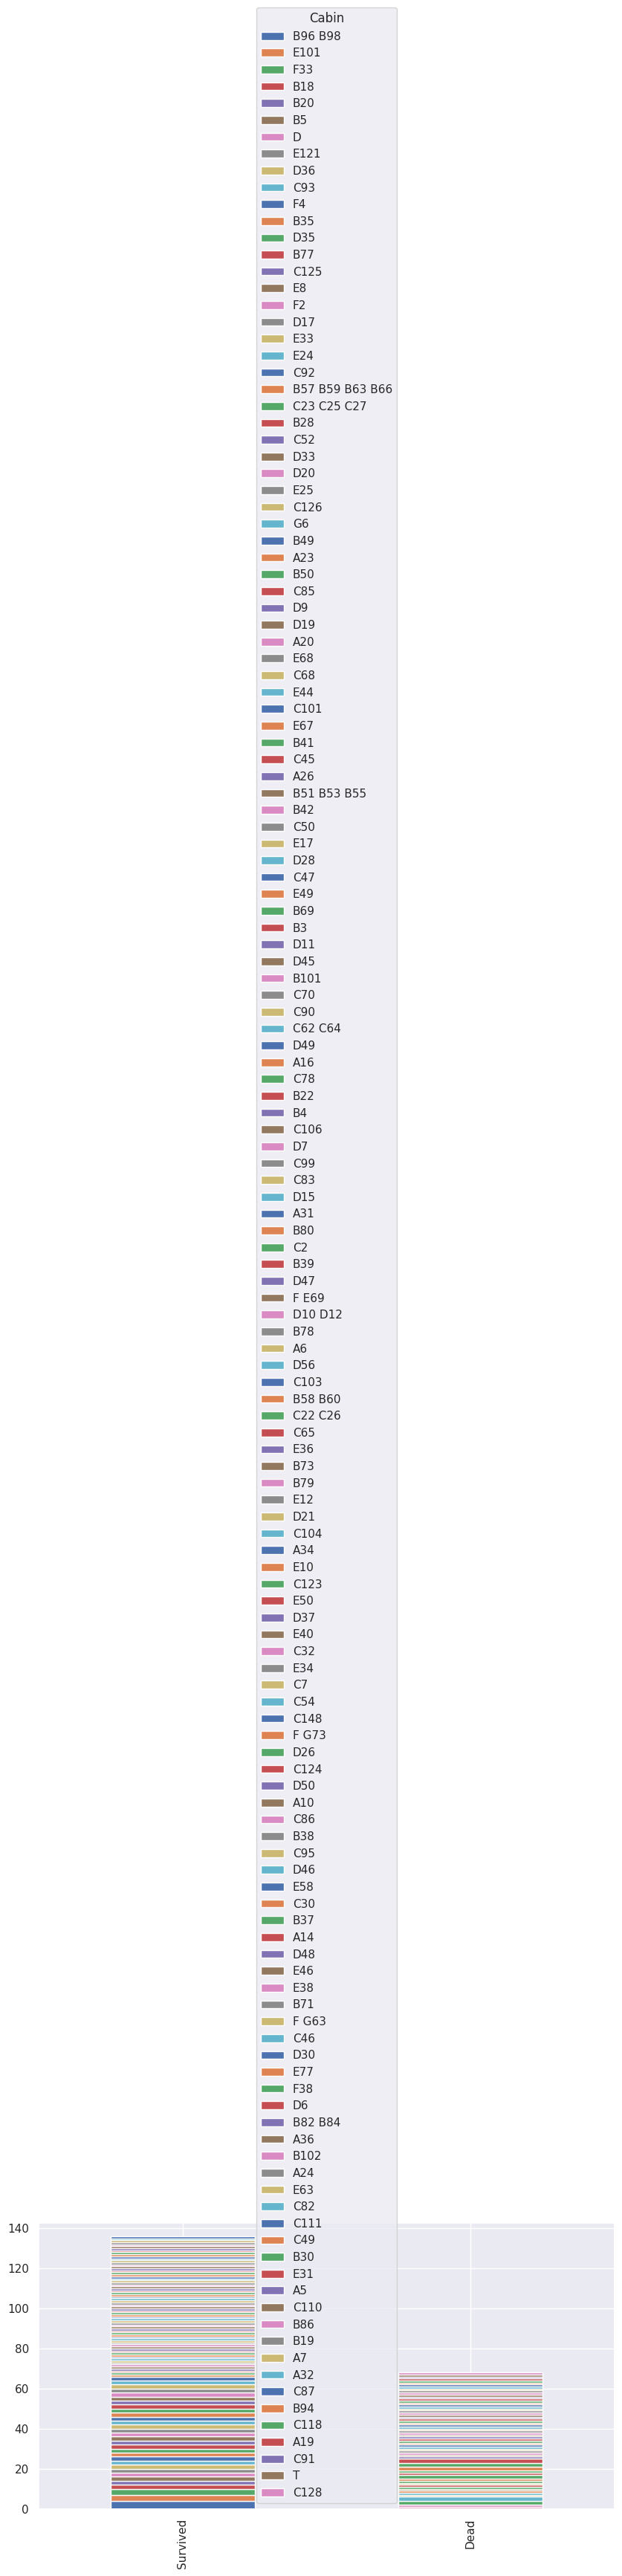

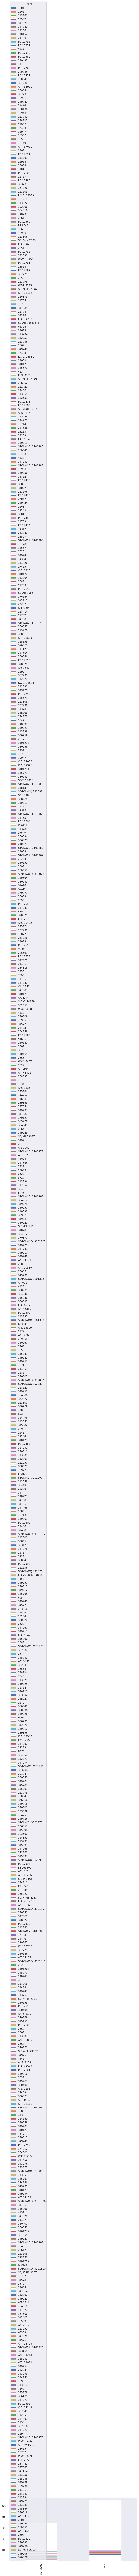

In [10]:
for i in cat_var.columns:
     bar_chart(i)

**Feature Engineering**

In [11]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


as we see in Name column won't help the predictive model ,so we think to extract titles for providing a more meaningful feature

In [12]:
df = [df_train,df_test]
for data in df:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.',expand = False)

In [13]:
df_train['Title'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

Title Map:

Mr:0

Miss:1

Mrs:2

author:3



In [14]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in df:
    data['Title'] = data['Title'].map(title_mapping)

In [15]:
df_train.drop('Name',axis = 1,inplace = True)
df_test.drop('Name',axis =1,inplace = True)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
sex_mapping = {"male": 0,"female": 1}
for data in df:
    data['Sex']=data['Sex'].map(sex_mapping)

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
# Compute median age for each title group
median_ages_train = df_train.groupby("Title")["Age"].transform("median")
median_ages_test = df_test.groupby("Title")["Age"].transform("median")

df_train['Age'].fillna(median_ages_train,inplace = True)
df_test['Age'].fillna(median_ages_test,inplace = True)

In [20]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Convert Age feature to categorical feature **

child:0
young:1
adult:2
mid_age:3
senior:4

In [21]:
for data in df:
    data.loc[data['Age']<=16,'Age'] = 0
    data.loc[(data['Age']>16) & (data['Age']<=26),"Age"] = 1
    data.loc[(data['Age']>26) & (data['Age']<=36),"Age"] = 2
    data.loc[(data['Age']>36) & (data['Age']<=62),"Age"] = 3
    data.loc[data['Age']>62,"Age"] = 4

In [22]:
df_train['Age'].value_counts()

Age
2.0    336
1.0    255
3.0    180
0.0    105
4.0     15
Name: count, dtype: int64

In [23]:
# fill missing Fare with median fare for each Pclass
df_train["Fare"].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [25]:
for data in df:
    data['Cabin_letter'] = data['Cabin'].str[0]



In [26]:
df_test['Cabin_letter'].value_counts()
#df_train['Cabin_letter'].value_counts()

Cabin_letter
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64

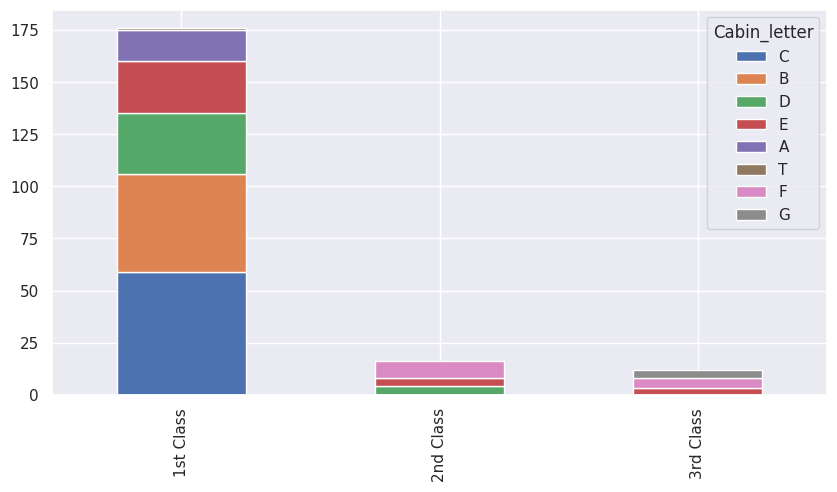

Pclass1:
 Cabin_letter
C    59
B    47
D    29
E    25
A    15
T     1
Name: count, dtype: int64
Pclass2:
 Cabin_letter
F    8
D    4
E    4
Name: count, dtype: int64
Pclass3:
 Cabin_letter
F    5
G    4
E    3
Name: count, dtype: int64


In [27]:
Pclass1 = df_train[df_train['Pclass'] == 1]['Cabin_letter'].value_counts()
Pclass2 = df_train[df_train['Pclass'] == 2]['Cabin_letter'].value_counts()
Pclass3 = df_train[df_train['Pclass'] == 3]['Cabin_letter'].value_counts()
df_2 = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df_2.index = ['1st Class','2nd Class','3rd Class']
df_2.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [28]:
df_train['Cabin_letter'].value_counts()

Cabin_letter
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [29]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in df:
    dataset['Cabin_letter'] = dataset['Cabin_letter'].map(cabin_mapping)

In [30]:
# fill missing Fare with median fare for each Pclass
df_train["Cabin_letter"].fillna(df_train.groupby("Pclass")["Cabin_letter"].transform("median"), inplace=True)
df_test["Cabin_letter"].fillna(df_test.groupby("Pclass")["Cabin_letter"].transform("median"), inplace=True)

In [31]:
df_train.drop('Cabin',axis = 1,inplace = True)
df_test.drop('Cabin',axis = 1,inplace = True)

In [32]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

we see that S in 80% of Embarked column.let's complete missing with S category

In [33]:
for dataset in df:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [34]:
Embarked_mapping = {"Q":0,"C":1,"S":2}
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

In [35]:
# fill missing Fare with median fare for each Pclass
df_train["Fare"].fillna(df_train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_letter
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,2,0,2.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,1,2,0.8
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,2,1,2.0
3,4,1,1,1,2.0,1,0,113803,53.1000,2,2,0.8
4,5,0,3,0,2.0,0,0,373450,8.0500,2,0,2.0
5,6,0,3,0,2.0,0,0,330877,8.4583,0,0,2.0
6,7,0,1,0,3.0,0,0,17463,51.8625,2,0,1.6
7,8,0,3,0,0.0,3,1,349909,21.0750,2,3,2.0
8,9,1,3,1,2.0,0,2,347742,11.1333,2,2,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,1,2,1.8


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


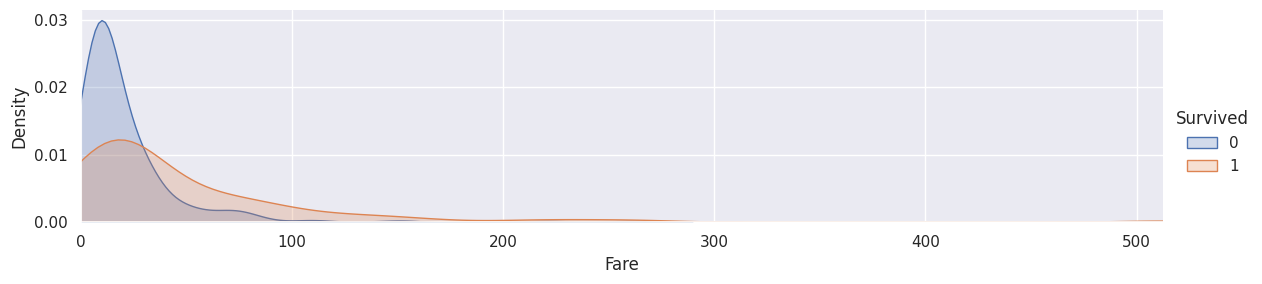

In [36]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, df_train['Fare'].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


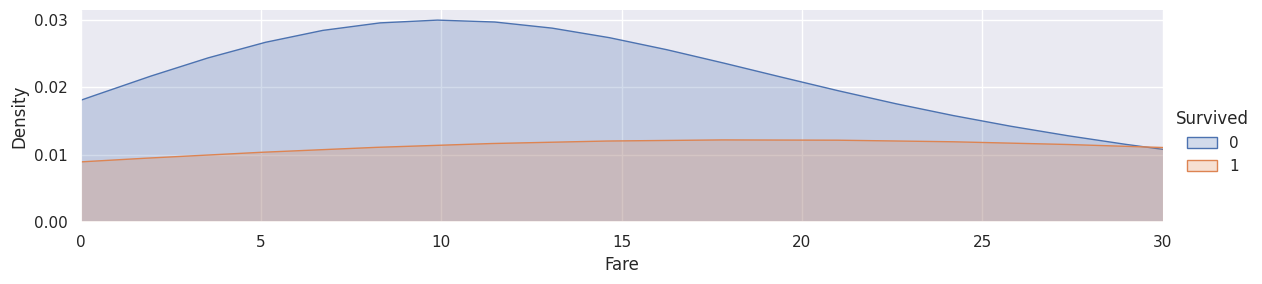

In [37]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, 30))
facet.add_legend()
plt.show()

In [38]:
for dataset in df:
    dataset.loc[dataset['Fare'] <= 30, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 1
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 2


In [39]:
df_train.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Cabin_letter
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2,0,2.0
1,2,1,1,1,3.0,1,0,PC 17599,1.0,1,2,0.8
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2,1,2.0
3,4,1,1,1,2.0,1,0,113803,1.0,2,2,0.8
4,5,0,3,0,2.0,0,0,373450,0.0,2,0,2.0
5,6,0,3,0,2.0,0,0,330877,0.0,0,0,2.0
6,7,0,1,0,3.0,0,0,17463,1.0,2,0,1.6
7,8,0,3,0,0.0,3,1,349909,0.0,2,3,2.0
8,9,1,3,1,2.0,0,2,347742,0.0,2,2,2.0
9,10,1,2,1,0.0,1,0,237736,1.0,1,2,1.8


**family size**

In [40]:
# +1 is for the passenger themselve
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [41]:
df_train['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

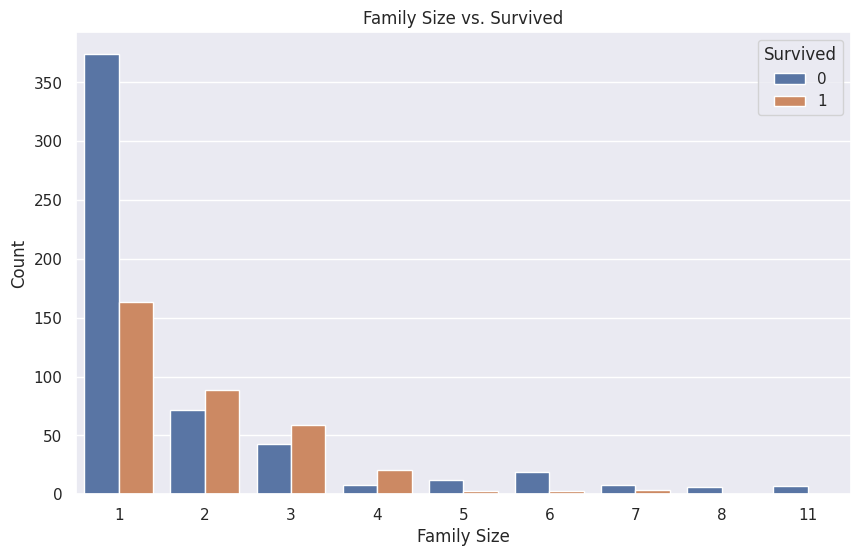

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df_train)
plt.title('Family Size vs. Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [43]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in df:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [44]:
df_train.drop(['Ticket','SibSp','Parch'],axis = 1,inplace = True)
df_test.drop(['Ticket','SibSp','Parch'],axis = 1,inplace = True)

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Cabin_letter,FamilySize
0,1,0,3,0,1.0,0.0,2,0,2.0,0.4
1,2,1,1,1,3.0,1.0,1,2,0.8,0.4
2,3,1,3,1,1.0,0.0,2,1,2.0,0.0
3,4,1,1,1,2.0,1.0,2,2,0.8,0.4
4,5,0,3,0,2.0,0.0,2,0,2.0,0.0


In [46]:
df_train.drop(['PassengerId'], axis=1,inplace =True)


In [47]:
train_data = df_train.drop('Survived',axis =1)
target_train = df_train['Survived']


**Model Building **

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10,shuffle = True,random_state = 42)


In [50]:



clf = [('KNN',KNeighborsClassifier(n_neighbors = 13)),
       ('Decision Tree',DecisionTreeClassifier()),
       ('Random Forest',RandomForestClassifier(n_estimators=13)),
       ('GaussianNb',GaussianNB()),
       ('SVM',SVC()),
        ('Extra Tree',ExtraTreeClassifier()),
       ('Gradient Boosting',GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10)),
       ('Ada Boost',AdaBoostClassifier()),
       ('Extra trees',ExtraTreesClassifier())]
for name,model in clf:
    score= cross_val_score(model,train_data,target_train,cv=k_fold,n_jobs=1,scoring = 'accuracy')
    print("score of model",name,': ',round(np.mean(score)*100,2))




score of model KNN :  82.49
score of model Decision Tree :  79.12
score of model Random Forest :  80.92
score of model GaussianNb :  78.9
score of model SVM :  83.16
score of model Extra Tree :  79.12
score of model Gradient Boosting :  81.25
score of model Ada Boost :  81.03
score of model Extra trees :  80.13


so we will choose SVM model

In [51]:
clf_SVM = SVC()
clf_SVM.fit(train_data,target_train)
test_data = df_test.drop(['PassengerId'], axis=1)
prediction = clf_SVM.predict(test_data)
prediction




array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [57]:
df_test['Survived'] = prediction
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': df_test['Survived']
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission3.csv', index=False)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64